# Stake: Dice

## What is the game?
The Dice game on Stake.com is a fast-paced, probability-based game where players bet on the outcome of a virtual 100-sided dice roll. It offers both simplicity and customization, appealing to both casual and strategic players.  
  
### What are the rules?

__Game Objective__  
Players aim to predict whether the dice roll will be higher or lower than a selected target number.

__Key Rules and Features__  
Bet Amount: Users specify the amount they wish to wager.

**Target Setting**: Players select a target number and choose whether to roll over or under that value.

**Payouts and Odds**: The potential payout is directly linked to the target number. A higher risk (e.g., predicting a roll over 90) results in a higher multiplier, while lower risk (e.g., under 10) offers a lower payout but a higher chance of winning.

**Return to Player (RTP)**: 99%, with a 1% house edge, ensuring transparency and fair play.

When I think about dice, probabilities comes to mind. If a dice is truly equal then there is a way to predict what the expected values would be in the long term. In this notebook, I will be using Monte Carlo to simulate the various outcomes of the game of dice under Stake.com.    

I will create two scenarios:
- Option 1 (With a 2% chance of winning, you get a 49.5x payout)
- Option 2 (With a 76.15% chance of winning, you get a 1.3x payout)   
- Each of these scenarios will be simulated over 1000x

After simulation both outcomes, I will be able to determine which is more optimal than the other.  
In hindsight, a 76.15% chance of winning seems to be the better choice in the long run. 

### Load Libraries

In [3]:
import numpy as np
import matplotlib.pyplot as plt

### Defining the parameters and function

In [4]:
# Parameters
rounds = 1000
bet_amount = 0.0025

# Option 1 - 2% chance to win, 49.5x payout
def simulate_option1():
    outcomes = np.random.rand(rounds) < 0.02  # True if win
    winnings = np.where(outcomes, bet_amount * 49.5, -bet_amount)
    return np.cumsum(winnings)

# Option 2 - 76.15% chance to win, 1.3x payout
def simulate_option2():
    outcomes = np.random.rand(rounds) > 0.7615  # True if win
    winnings = np.where(outcomes, bet_amount * 1.3, -bet_amount)
    return np.cumsum(winnings)

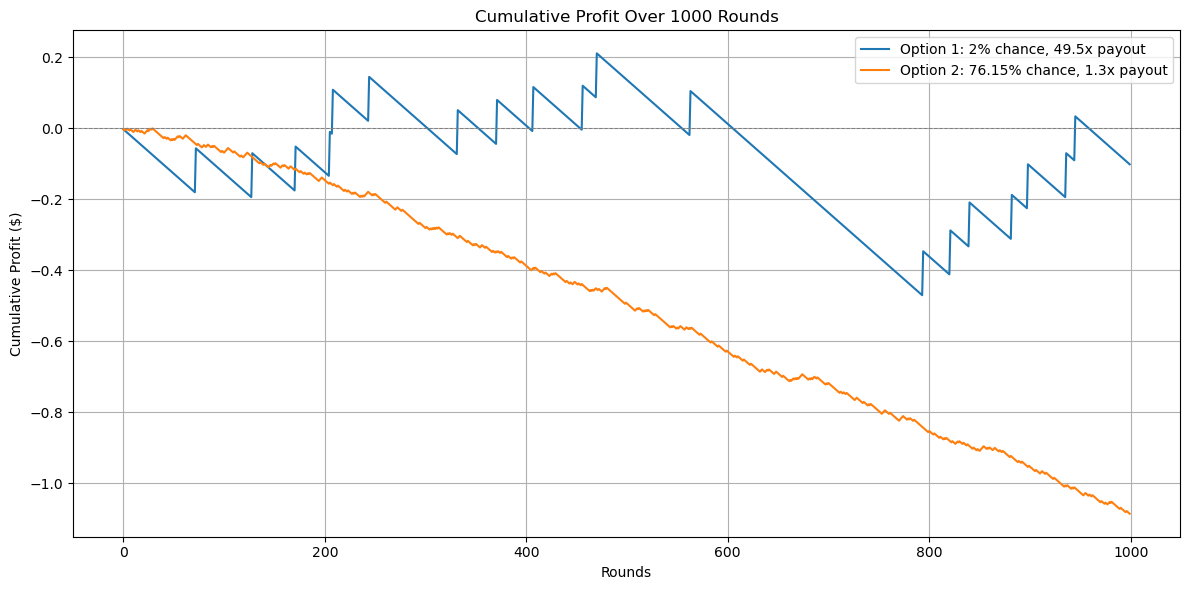

In [9]:
# Simulate both
np.random.seed(42)  # For reproducibility
balance_option1 = simulate_option1()
balance_option2 = simulate_option2()

# Plotting
plt.figure(figsize=(12, 6))
plt.plot(balance_option1, label='Option 1: 2% chance, 49.5x payout')
plt.plot(balance_option2, label='Option 2: 76.15% chance, 1.3x payout')
plt.axhline(0, color='gray', linestyle='--', linewidth=0.7)
plt.title('Cumulative Profit Over 1000 Rounds')
plt.xlabel('Rounds')
plt.ylabel('Cumulative Profit ($)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


Based on the first simulation above, option 2 does not offer a good expected value in the long run.  
On the other hand, option 1 has a better chance despite having a low winning percentage of **2%**.  
While this finding is interesting, this only represents one simulation.  
Let's re-run this simulation 1000x.

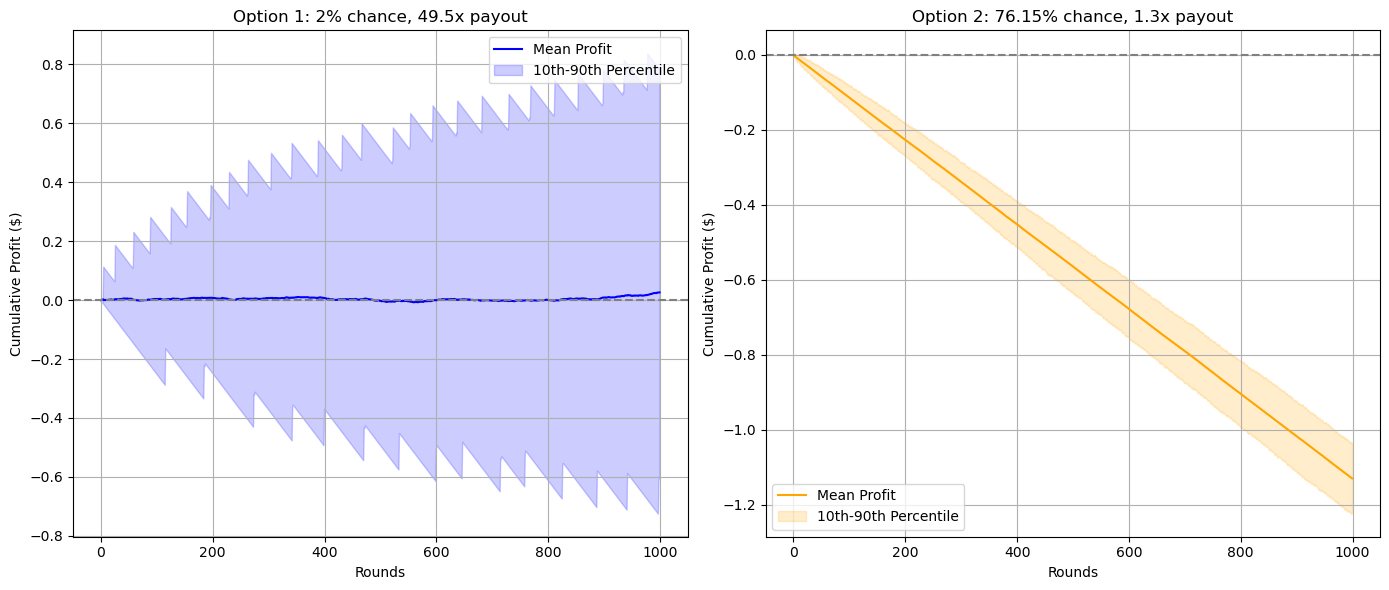

In [12]:
# Simulate multiple trials to observe variance
num_trials = 1000
all_balances_option1 = []
all_balances_option2 = []

np.random.seed(42)  # For reproducibility

for _ in range(num_trials):
    all_balances_option1.append(simulate_option1())
    all_balances_option2.append(simulate_option2())

# Convert to arrays
all_balances_option1 = np.array(all_balances_option1)
all_balances_option2 = np.array(all_balances_option2)

# Calculate mean and percentiles for shading
mean_option1 = np.mean(all_balances_option1, axis=0)
p10_option1 = np.percentile(all_balances_option1, 10, axis=0)
p90_option1 = np.percentile(all_balances_option1, 90, axis=0)

mean_option2 = np.mean(all_balances_option2, axis=0)
p10_option2 = np.percentile(all_balances_option2, 10, axis=0)
p90_option2 = np.percentile(all_balances_option2, 90, axis=0)

# Plotting
plt.figure(figsize=(14, 6))

# Option 1 plot
plt.subplot(1, 2, 1)
plt.plot(mean_option1, label='Mean Profit', color='blue')
plt.fill_between(range(rounds), p10_option1, p90_option1, color='blue', alpha=0.2, label='10th-90th Percentile')
plt.title('Option 1: 2% chance, 49.5x payout')
plt.xlabel('Rounds')
plt.ylabel('Cumulative Profit ($)')
plt.axhline(0, color='gray', linestyle='--')
plt.legend()
plt.grid(True)

# Option 2 plot
plt.subplot(1, 2, 2)
plt.plot(mean_option2, label='Mean Profit', color='orange')
plt.fill_between(range(rounds), p10_option2, p90_option2, color='orange', alpha=0.2, label='10th-90th Percentile')
plt.title('Option 2: 76.15% chance, 1.3x payout')
plt.xlabel('Rounds')
plt.ylabel('Cumulative Profit ($)')
plt.axhline(0, color='gray', linestyle='--')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()


After committing an inception by running a simulation within a simulation 1000x, the results are quite fascinating.  
**Option 1:** While having the lowest % of winning rate, it seems to have a true randomness to its outcome. A user can either do extremely well or extremely bad but also is able to be inbetween.  
**Option 2:** Despite a ~76% chance of winning, you would expect a good expected value in the long run. However, this is not the case. User getting in this option actually loses in the long run than users in option 1. 